<a href="https://colab.research.google.com/github/drusho/drusho.github.io/blob/master/_notebooks/2021_07_03_Analysis_of_US_Firework_Sales_and_Injuries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Firework Sales and Injuries (2016-2021)
> Data Exploration, Visualizations, Plotly, Seaborn

- toc: true 
- badges: false
- comments: true
- categories: [Pandas, Plotly, Seaborn]
- image: "images/thumbnails/fireworks.png"

## __Introduction__

#### __Goals__

<details>

<summary>Goals</summary>

Provide an overview of incidents that involve fireworks.  This includes understaing which age groups are most affected and frequency of injury types.  Provide sales figures for fireworks across the US.

</details>

#### __Conclusions__

<details>  

<summary>Injury</summary>

Ages 0-20 showed the highest rate of injury.  Injury rates by age decrease with age.  The 60+ age groups showed the lowest rate of injury

Injuries to the hands, face, and eyes were the most common, while injuries to lower extemities were less common.

</details>  

<details>  

<summary>Sales</summary>

The state of Missouri held the record for most spent on fireworks (over 250 million dollars over the past 5 years).  For comparision, Alaska spent around 560,000 dollars with the last five years

</details>  

<details>  

<summary>Correlation</summary>

There was no significate correlation between the number of injuries in a year compared to the number of sales.

</details>  


#### __Resources__


1. [Firework Injury Reports](https://www.cpsc.gov/cgibin/NEISSQuery/UserCriteria.aspx?UserAff=5x08cgz9T6YPDAZJzvlZjA%3d%3d&UserAffOther=9OYR9kUytIsLilKZieD5xg%3d%3d)

2. [USA Trade Census](https://usatrade.census.gov/)

<details>

<summary>Source Details</summary>

Source 1 consisted multiple excel incident reports involving fireworks over the past 5 years taken from the U.S. Consumer Product Safety Commission (CPSC).

The NEISS injury data are gathered from the emergency departments (ED) of 96 hospitals selected as a probability sample of all U.S. hospitals with 24-hour EDs and at least 6 inpatient beds. Each participating NEISS hospital is hand-selected by CPSC because it provides an important representation of all other hospitals of its size and unique characteristics in the U.S.

Source 2 conatins Sales and Trade data for each state regarding fireworks.  Reports data range from 2016 to April 2021.

</details>

#### __Tools Used__

<details>

<summary>Tools</summary>

* Matplotlib
* Pandas
* Seaborn
* Plotly

</details>

## Import Libraries
___

In [1]:
#collapse
# install libraries to save plotly images to disk
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [2]:
#collapse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Firework Injury Datasets
---

In [3]:
#collapse-output
# Import clean injury dataframe
injury = 'https://github.com/drusho/fireworks_data_exploration/raw/main/data/data_clean/df_injury_clean.csv'
df_injury = pd.read_csv(injury,usecols=[1,2,3,4,5,6,7,8,9,10])
df_injury.head(3)

,Treatment_Date,Age,Sex,Alcohol,Drug,Narrative,Incident Locale,Body_Part,Diagnosis,Disposition
0,1/1/16,39,Male,NaN,NaN,39YOM WAS LIGHTING BOTTLE ROCKETS AND ONE FLEW...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released
1,1/1/16,13,Male,NaN,NaN,13YOM SOMEONE POINTED FIREWORKS AT HIM FROM 10...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released
2,7/5/16,31,Female,NaN,NaN,A 31YOF WAS STRUCK TO EYE WITH PIECE OF FIRECR...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released


### Displaying Column Data Types

In [4]:
#collapse-output
#Change dtype for 'Treatment_Date' to datetime dtype
df_injury.Treatment_Date = pd.to_datetime(df_injury.Treatment_Date)
df_injury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Treatment_Date   1532 non-null   datetime64[ns]
 1   Age              1532 non-null   int64         
 2   Sex              1532 non-null   object        
 3   Alcohol          701 non-null    float64       
 4   Drug             701 non-null    float64       
 5   Narrative        1532 non-null   object        
 6   Incident Locale  1532 non-null   object        
 7   Body_Part        1532 non-null   object        
 8   Diagnosis        1532 non-null   object        
 9   Disposition      1532 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 119.8+ KB


### Converting Alchol/Drug booleans (0,1) values to yes/no

In [5]:
#collapse-output
#Converting Alcohol and Drug columns to 'yes/no' values
#Fill nan values to 0.0 
#Convert all values to float type
#Convert 0.0 to No and 1.0 to Yes

#Change nan values to to 0.0 string
df_injury.Alcohol = df_injury['Alcohol'].fillna(0.0)

# Convert dytpe to float
df_injury.Alcohol = df_injury.Alcohol.astype('float')

# Convert Alcohol to Yes/No
df_injury.Alcohol = df_injury['Alcohol'].replace(1.0,"Yes").replace(0.0,"No")
df_injury.head(2)

#Change nan values to to 0.0 string
df_injury.Drug = df_injury['Drug'].fillna(0.0)

# Convert dytpe to float
df_injury.Drug = df_injury.Drug.astype('float')

# Convert Drug to Yes/No
df_injury.Drug = df_injury['Drug'].replace(1.0,"Yes").replace(0.0,"No")
df_injury.head(2)

,Treatment_Date,Age,Sex,Alcohol,Drug,Narrative,Incident Locale,Body_Part,Diagnosis,Disposition
0,2016-01-01,39,Male,No,No,39YOM WAS LIGHTING BOTTLE ROCKETS AND ONE FLEW...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released
1,2016-01-01,13,Male,No,No,13YOM SOMEONE POINTED FIREWORKS AT HIM FROM 10...,Home,Eyeball,"Contusions, Abrasions",Treated/Untreated and Released


### Counting Drug and Alchol Use

The number of people injuried with positive results for drug or alcohol use was very insignificant compared to overall count of injuries.  

In [6]:
#collapse-output
# Count Drug and Alcohol for df_injury
df_da = df_injury.groupby(['Drug','Alcohol'])['Age'].count().reset_index(name='count')
df_da

,Drug,Alcohol,count
0,No,No,1487
1,No,Yes,40
2,Yes,No,1
3,Yes,Yes,4


### Visualizing Drug and Alcohol Usuage (Bar Plot)

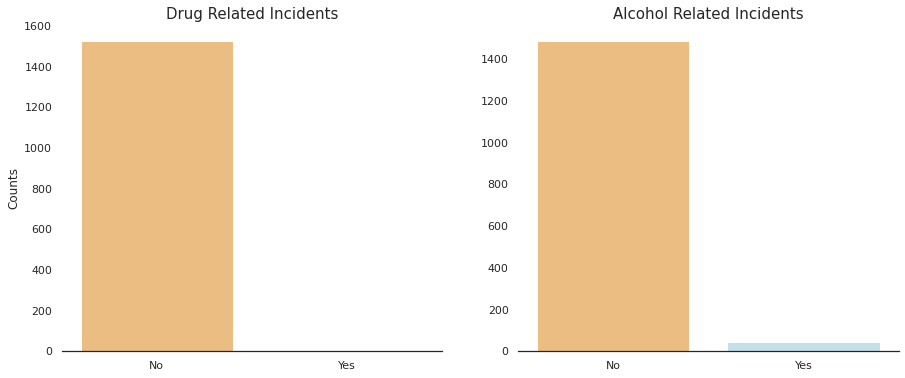

In [7]:
#collapse
#define figure size
sns.set(rc={"figure.figsize":(15, 6)})

#set background to white
sns.set_style("white")

fig, ax = plt.subplots(1,2)

sns.countplot(df_injury['Drug'], 
              ax=ax[0],
              palette="RdYlBu")

ax[0].set_title('Drug Related Incidents', 
             fontdict = {'fontsize': 15})
ax[0].set(ylabel='Counts',
       xlabel='')

sns.countplot(df_injury['Alcohol'], 
              ax=ax[1],
              palette="RdYlBu")

ax[1].set_title('Alcohol Related Incidents', 
             fontdict = {'fontsize': 15})
ax[1].set(ylabel='',
       xlabel='')

# remove spines
sns.despine(left=True)

#save to png
# fig.savefig("Drug/Alcohol Counts.png")

plt.show()
fig.savefig('Drug_and_Alcohol_Counts.png')

plt.show()

In [8]:
#collapse
# Sort DF by treatment date
df_injury.sort_values(by = 'Treatment_Date',
                      inplace = True)

### Visualizing Incident Counts by Year (Bar Plot)

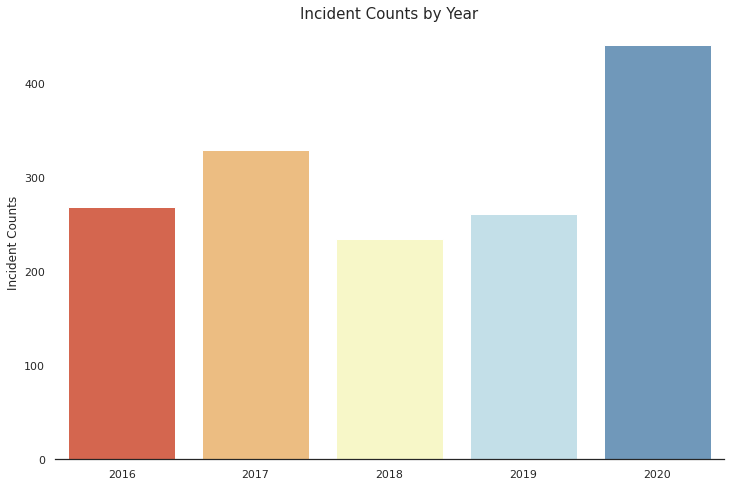

In [9]:
#collapse
# Incident Counts by Year BarGraph

#define figure size
sns.set(rc = {"figure.figsize":(12,8)})

#set background to white
sns.set_style("white")

treamentDates = df_injury['Treatment_Date'].dt.year.value_counts().sort_index().reset_index()

ax = sns.barplot(y="Treatment_Date", 
                 x="index", 
                 data=treamentDates, 
                 palette="RdYlBu")

#set x,y labels
ax.set(xlabel='',
       ylabel='Incident Counts')

#set titles
ax.set_title('Incident Counts by Year', 
             fontdict = {'fontsize': 15})

#remove spiens
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Year.png")

plt.show()

### Visualizing Incident Counts by Gender (Bar Plot)

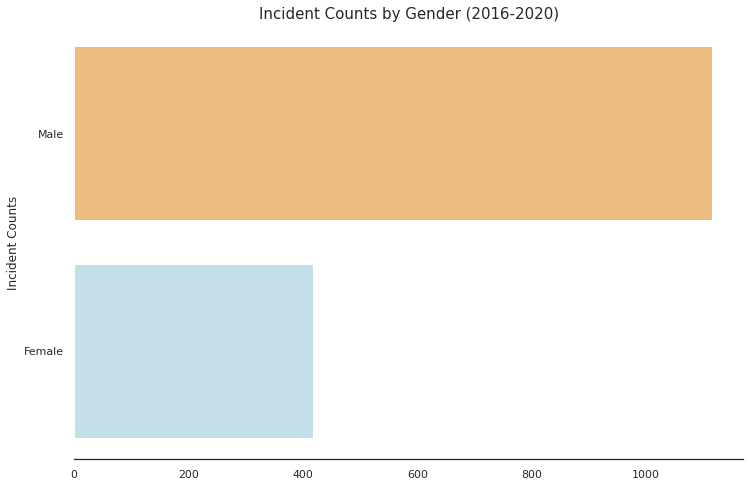

In [10]:
#collapse
# Incident Counts by Sex

incidentSex = df_injury['Sex'].value_counts().reset_index(name='incidents')

#define figure size
sns.set(rc={"figure.figsize":(12, 8)})

#set background to white
sns.set_style("white")

ax = sns.barplot(x="incidents", 
                 y="index", 
                 data=incidentSex, 
                 palette="RdYlBu")

#set x,y labels
ax.set(xlabel='',
       ylabel='Incident Counts')

#set titles
ax.set_title('Incident Counts by Gender (2016-2020)', 
             fontdict = {'fontsize':15})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Gender.png")

plt.show()

### Visualizing Incident Counts by Body Part (Bar Plot)

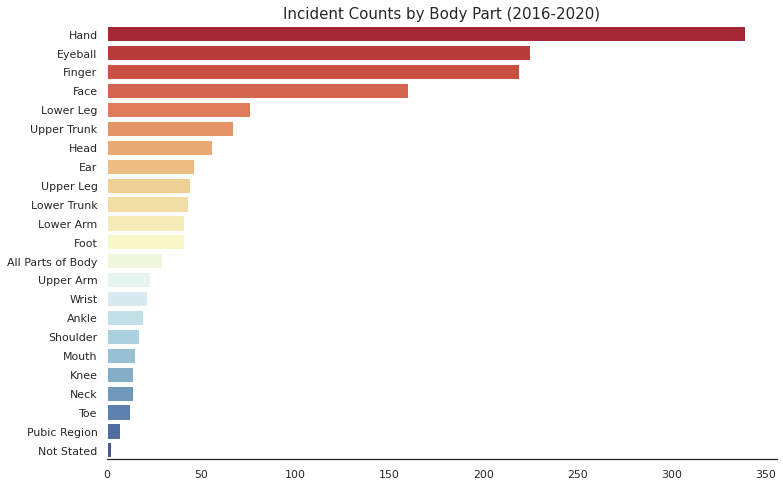

In [11]:
#collapse
# Incident Counts by Body Part

#define figure size
sns.set(rc={"figure.figsize":(12,8)})

#set background color
sns.set_style("white")

incidentBp = df_injury['Body_Part'].value_counts().reset_index(name='incidents').head(23)

ax = sns.barplot(x="incidents", 
                 y="index", 
                 data=incidentBp, 
                 palette="RdYlBu")

#set x,y labels
ax.set(xlabel='',
       ylabel='')

#set title
ax.set_title('Incident Counts by Body Part (2016-2020)', 
             fontdict = {'fontsize':15})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Body Part.png")

plt.show()

### Fixing Age Column

|Age Code|Description             |
|--------|------------------------|
|0       |No Recorded Age         |
|2       |2 Years Old             |
|45      |45 Years Old            |
|100     |100 Years Old           |
|102     |102 Years Old           |
|201     |Three Weeks Old         |
|201     |Four Weeks Old          |
|201     |Seven Weeks Old         |
|202     |Ten Weeks Old           |
|209     |Nine Months Old         |
|212     |Twelve months (one year)|
|218     |Eighteen months         |

<details>

<summary>Details</summary>

The Age column list not only numeric ages but also includes category codes for individuals under the age of 2 year old.  Individuals that are under 2 years old are given a code starting with 200 combined with their age in months.  If the patient is older than 115 years old, code the age as 115 and indicate the actual age in the Comment. If the ED record indicates the patient was born on January 1, 1900, please verify the patient’s age with hospital staff – some hospitals use this date when the patient’s age is unknown.

</details>

<details>

<summary>Note</summary>

CPSC prefers that coders use the Date of Birth variable in lieu of the age variable. Mistakes in coded ages are common when patients have birthdays after the date of treatment and before the NEISS coder codes the case. Hospital medical record systems automatically update the age of the patient daily.

</details>
 

In [12]:
#hide
def fix_age(age):
  if 201 <= age <=209:
    age = 0
    return age
  elif age >=201:
    age = 1
    return age
  else:
    return age

df_injury['Age_Fix'] = df_injury['Age'].apply(fix_age)
df_injury.query('Age>=200').head()

df_injury.to_csv('df_injury_clean2.csv')

### Visualizing Age Groups (Histogram) 

<details>

<summary>Details</summary>

The histogram below shows that the majority of firework related injuries that were reported occured with indivuals under the age of 40.  The largest grouping belonged to individuals under the age of 20, which is also below the legal drinking age in the US.  

</details>

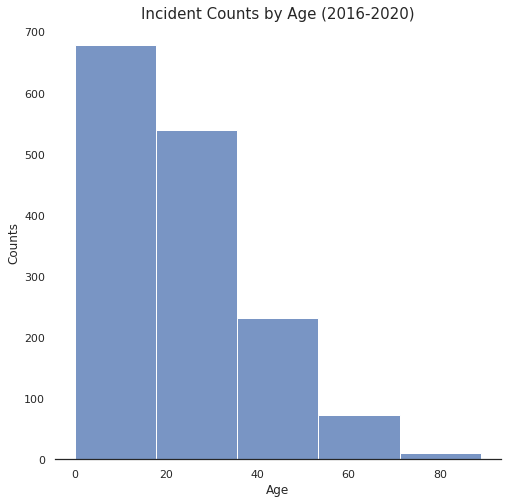

In [13]:
#collapse
# Histogram of Ages

#set figsize
sns.set(rc={"figure.figsize":(8, 8)})

#set background color
sns.set_style("white")

ax = sns.histplot(data=df_injury, 
                  x='Age_Fix', 
                  bins=5)

#set x,y labels
ax.set(xlabel='Age',
       ylabel='Counts')

#set title
ax.set_title('Incident Counts by Age (2016-2020)', 
             fontdict = {'fontsize':15})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Age_Hist.png")

plt.show()

### Visualizing Incident Counts by Age (Bar Plot)

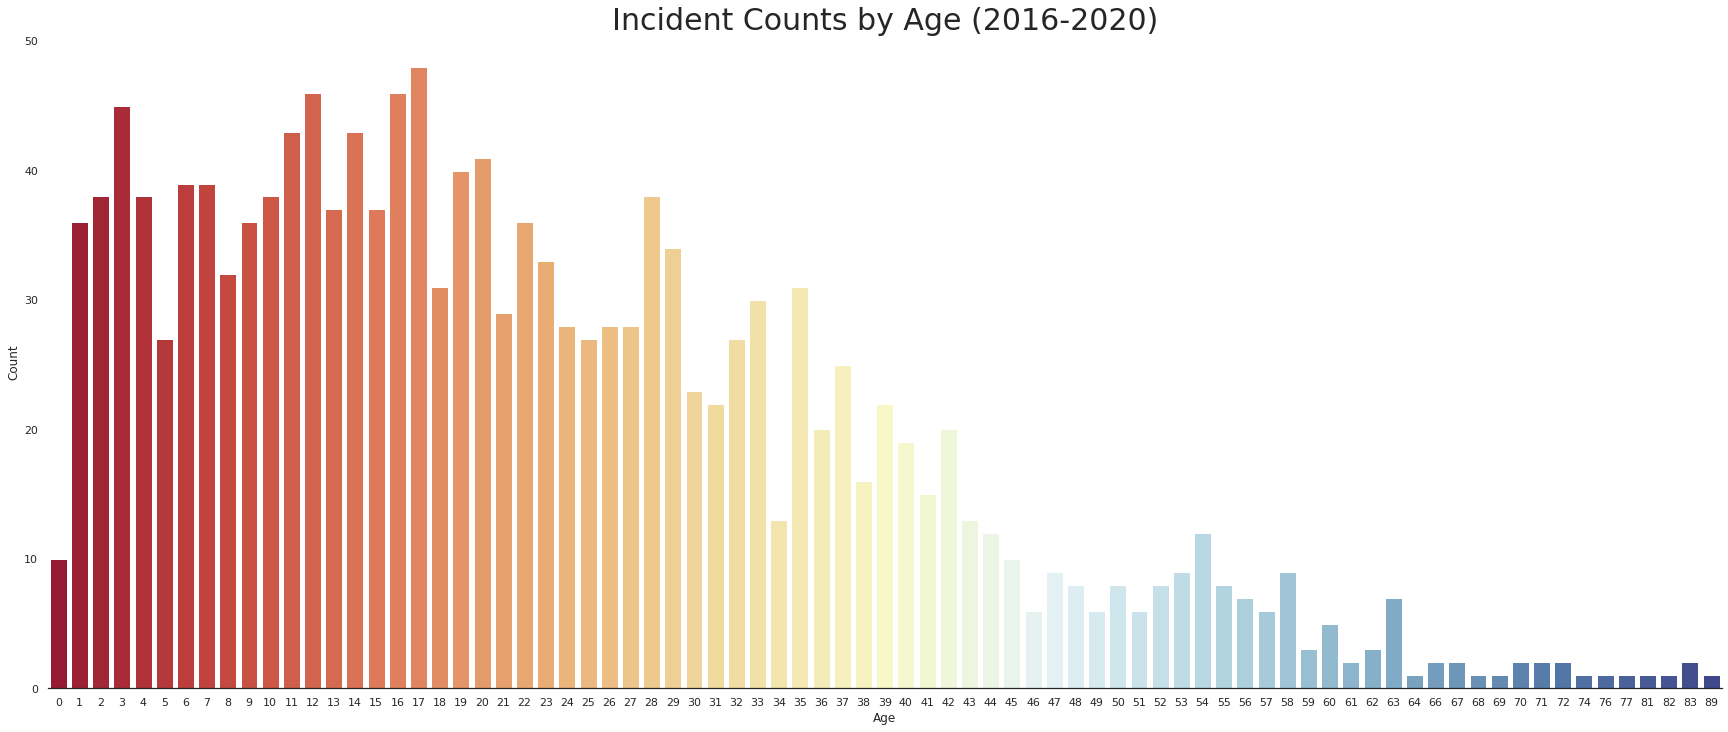

In [14]:
#collapse
# Incident Counts by Age (Age_Fix)

#define figure size
sns.set(rc={"figure.figsize":(30, 12)})

#set background color
sns.set_style("white")

incidentAge = df_injury['Age_Fix'].value_counts().reset_index(name='incidents')

ax = sns.barplot(y="incidents", 
                 x="index", 
                 data=incidentAge, 
                 palette="RdYlBu")

#set x,y labels
ax.set(xlabel='Age',
       ylabel='Count')

#set title
ax.set_title('Incident Counts by Age (2016-2020)', 
             fontdict = {'fontsize':30})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Age_Bar.png")

plt.show()

### Visualizing Age, Year, Gender (Swarm Plot)

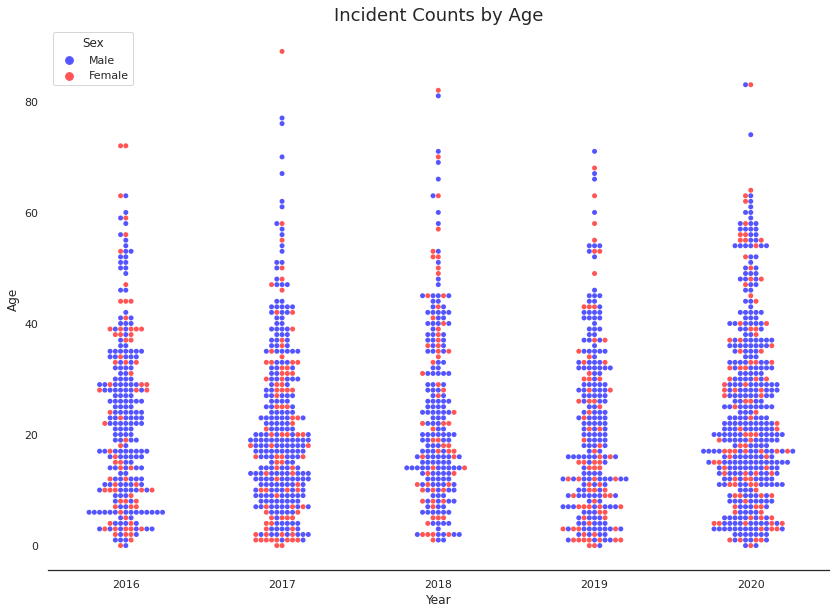

In [15]:
#collapse
# Swarm graph by age, year, and gender

#define figure size
sns.set(rc={"figure.figsize":(14,10)})

#set background color
sns.set_style("white")

ax = sns.swarmplot(data = df_injury, 
                   x = df_injury['Treatment_Date'].dt.year, 
                   y = "Age_Fix",
                   hue = "Sex",
                   palette = "seismic")

#set x,y labels
ax.set(xlabel = 'Year',
       ylabel = 'Age')

#set title
ax.set_title('Incident Counts by Age', 
             fontdict = {'fontsize':18})

#remove spines
sns.despine(left=True)

#save to png
ax.figure.savefig("Incident Counts by Age_Swarm.png")

plt.show()

### Visualizing Incident Counts by Disposition (Bar Plot)

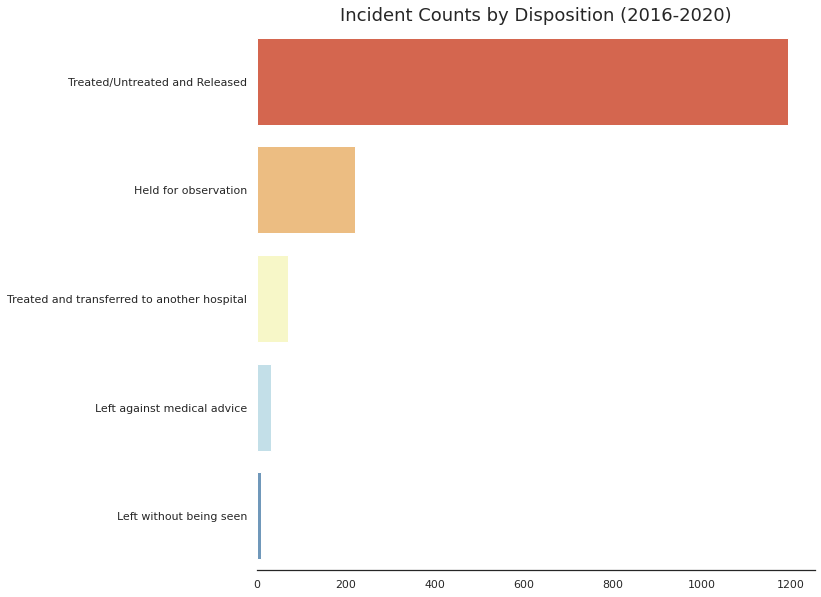

In [16]:
#collapse
# Incident Counts by Disposition

incidentDis = df_injury['Disposition'].value_counts().reset_index(name='incidents').head()

#define figure size
sns.set(rc={"figure.figsize":(10,10)})

#set background color
sns.set_style("white")

ax = sns.barplot(x = "incidents", 
                 y = "index", 
                 data = incidentDis, 
                 palette = "RdYlBu")

#set x,y labels
ax.set(xlabel = '',
       ylabel = '')

ax.set_title('Incident Counts by Disposition (2016-2020)', 
             fontdict = {'fontsize':18})

#set title
# ax.set_ylabel('', fontdict= {'fontsize':25})

#remove spine
sns.despine(left=True)

#save to png
# ax.figure.savefig("Incident Counts by Disposition.png")

plt.show()

### Visualizing Incident Counts by Diagnosis (Bar Plot)

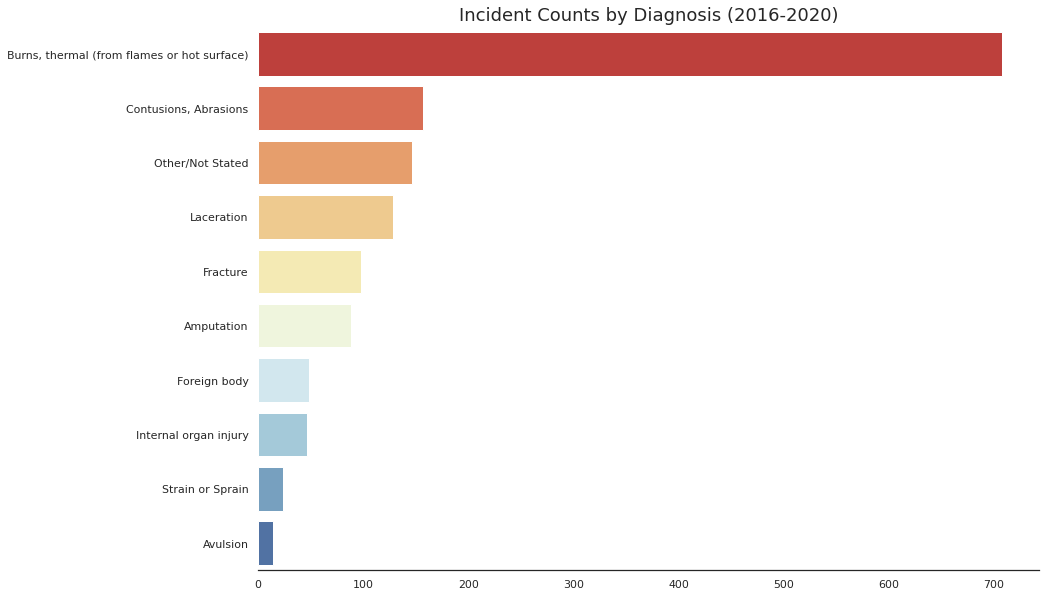

In [17]:
#collapse
# Incident Counts by Diagnosis

incidentDia = df_injury['Diagnosis'].value_counts().reset_index(name='incidents').head(10)

#define figure size
sns.set(rc={"figure.figsize":(14,10)})

#set background color
sns.set_style("white")

ax = sns.barplot(x = "incidents", 
                 y = "index", 
                 data = incidentDia, 
                 palette = "RdYlBu")

#set x,y labels
ax.set(xlabel = '',
       ylabel = '')

#set title
ax.set_title('Incident Counts by Diagnosis (2016-2020)', 
             fontdict = {'fontsize':18})

#remove spine
sns.despine(left=True)

# #set y axis labels (shortened longer labels to fit for print out)
# ax.set_yticklabels(['Burns', 'Contusions', 'Abrasions','Other/Not Stated',
#                     'Laceration','Fracture','Amputation','Foreign body',
#                     'Internal organ','Strain or Sprain','Avulsion',
#                     'Anoxia','Puncture','Poisoning','Dermatitis', 'Conjunctivitis',
#                     'Concussions','Hematoma'])

#save to png
ax.figure.savefig("Incident Counts by Diagnosis.png")

plt.show()

## __Import Firework Sales Data (State)__
---

In [18]:
#collapse
sales_state = 'https://github.com/drusho/fireworks_data_exploration/raw/main/data/data_raw/State%20Imports%20by%20HS%20Commodities.csv'
df_sales_st = pd.read_csv(sales_state,skiprows=4,usecols=[0,1,2,3])
df_sales_st.head()

,State,Commodity,Time,Total Value ($US)
0,Alabama,360410 Fireworks,2016,"29,602,090"
1,Alabama,360410 Fireworks,2017,"19,396,430"
2,Alabama,360410 Fireworks,2018,"26,399,895"
3,Alabama,360410 Fireworks,2019,"28,353,392"
4,Alabama,360410 Fireworks,2020,"23,141,950"


### Web Scraping for State Abbreviations

<details>

<summary>Details</summary>

The dataframe was missing state abbreviations that are needed to plot data onto a map using Plotly.  Used pandas function 'read_hml' to read tables from a website that contact state and state abbreviation data.

</details>

In [19]:
#collapse
#WebScrap State Abbreviations

#scrap state names and abbrev
states_abrev = pd.read_html('https://abbreviations.yourdictionary.com/articles/state-abbrev.html')[0].iloc[1:,:2]

#scrap US territory names and abbrev
territories = pd.read_html('https://abbreviations.yourdictionary.com/articles/state-abbrev.html')[1].iloc[[2,5],:2]

#merge dfs
st_at = states_abrev.merge(territories,how='outer').sort_values(by=0).reset_index(drop=True)

#rename cols
st_at.rename(columns={0:'State',1:'Abbrevation'},inplace=True)

st_at.head()

,State,Abbrevation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


### Merging State Abbreviations with Master Dataframe

In [20]:
#collapse
#merge abbrevation with state sales data
df_sales_st2 = df_sales_st.merge(st_at,how='inner')

df_sales_st2.head()

,State,Commodity,Time,Total Value ($US),Abbrevation
0,Alabama,360410 Fireworks,2016,"29,602,090",AL
1,Alabama,360410 Fireworks,2017,"19,396,430",AL
2,Alabama,360410 Fireworks,2018,"26,399,895",AL
3,Alabama,360410 Fireworks,2019,"28,353,392",AL
4,Alabama,360410 Fireworks,2020,"23,141,950",AL


In [21]:
#collapse-output
#Convert Sales to int dtype
df_sales_st2['Total Value ($US)'] = df_sales_st2['Total Value ($US)'].str.replace(',','').astype('int')
df_sales_st2.head(2)

#Convert Time to datetime dtype
df_sales_st2['Time'] = df_sales_st2['Time'].str.replace('2021 through April','2021')
df_sales_st2['Time'] = pd.to_datetime(df_sales_st2['Time'])

#export csv of clean data
df_sales_st2.to_csv('df_state_sales_clean.csv')

df_sales_st2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 284
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   State              285 non-null    object        
 1   Commodity          285 non-null    object        
 2   Time               285 non-null    datetime64[ns]
 3   Total Value ($US)  285 non-null    int64         
 4   Abbrevation        285 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 13.4+ KB


### Visualizating State Sales (Bar Plot)

In [22]:
#collapse
# Visualization State Sales (Bar Plot)
st_sales = df_sales_st2.copy()

st_sales = st_sales.groupby('State')['Total Value ($US)'].sum().reset_index(name='Sales').sort_values(by='Sales',ascending=False).reset_index(drop=True).head(20)

st_sales.sort_values(by='Sales',ascending=True,inplace=True)

fig = px.bar(st_sales, 
             y='State', 
             x='Sales',
             orientation='h',
             color_continuous_scale='Portland',
             color="Sales")

fig.update_layout({"plot_bgcolor":"rgba(255,255,255, 0.9)"},
                  title={'text': "Firework Total Sales ($USD) 2016-2020",
                  'y':.98,
                  'x':.5,
                  'xanchor': 'center',
                  'yanchor': 'top'})

fig.show()

# # save fig to image
# fig.write_image("Total Firework Sales ($USD) 2016-2020.png", width=1980, height=1080)

# fig.write_html("Total Firework Sales ($USD) 2016-2020.html") 

### Visualizating State Sales (Scatter Plot)

In [23]:
#collapse
# Visualization State Sales (Scatter Plot)
#Plotly currently does not have the ability to position colorscales to horizontal.

df_sales_st2.sort_values(by='State',ascending=False,inplace=True)

fig = px.scatter(df_sales_st2, 
                 y="State", 
                 x="Time", 
                 color="Total Value ($US)",
                 size='Total Value ($US)', 
                 width=800, height=1100,
                 color_continuous_scale='Portland')

#change background and legend background to white
fig.update_layout({"plot_bgcolor":"rgba(255,255,255, 0.9)"},
                  #  "paper_bgcolor": "rgba(255,255,255, 0.9)"},
                  title={'text': "Firework Sales ($USD)",
                         'y':.98,
                         'x':.5,'xanchor':'center',
                         'yanchor': 'top'},
                  xaxis=dict(title=''),
                  yaxis=dict(title=''))

fig.show()

# save fig to image
fig.write_image("Firework Sales ($USD) (scatter_plot).png", width=800, height=1000)

fig.write_html("Firework Sales ($USD) (scatter_plot).html")



### Visualizating State Sales (Heatmap Plot of US)

In [24]:
#hide
df_sales_st2.head(2)

,State,Commodity,Time,Total Value ($US),Abbrevation
284,Wyoming,360410 Fireworks,2021-01-01,606265,WY
283,Wyoming,360410 Fireworks,2020-01-01,2208173,WY


In [25]:
#collapse
fig = px.choropleth(df_sales_st2,  # Input Pandas DataFrame
                    locations="Abbrevation",  # DataFrame column with locations
                    color="Total Value ($US)",  # DataFrame column with color values
                    hover_name="Abbrevation", # DataFrame column hover info
                    locationmode = 'USA-states', # Set to plot as US States
                    color_continuous_scale='Blues') 
fig.update_layout(
    title={
        'text': "Firework Total Sales ($USD) 2016-2020",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    geo_scope='usa')  # Plot only the USA instead of globe

fig.show()

# save fig to image
fig.write_image("Total State Firework Sales ($USD) 2016-2020 (map).png", 
                width=1980, 
                height=1080)
fig.write_html("Total State Firework Sales ($USD) 2016-2020 (map).html")

# Putting It All Together 

* Combining injury and sales data.
* Sales and Injury Correlation

### Total Sales Groupby Year

In [26]:
#collapse
# Total Sales groupby Year
sales_year = df_sales_st2.groupby(df_sales_st2['Time'].dt.year).sum().reset_index(drop=False)
sales_year.rename(columns={'Time':'Year','Total Value ($US)':'Sales'},inplace=True)
sales_year

,Year,Sales
0,2016,307825710
1,2017,279962808
2,2018,331072715
3,2019,320021354
4,2020,300987616
5,2021,157186415


### Total Injuries Groupby Year

In [27]:
#collapse
# df_injury.groupby(['Treatment_Date']
df_injury_count = df_injury.groupby(df_injury['Treatment_Date'].dt.year)['Age'].count().reset_index(name='Count')
df_injury_count.rename(columns={'Treatment_Date':'Year'},inplace=True)
df_injury_count

,Year,Count
0,2016,268
1,2017,329
2,2018,234
3,2019,261
4,2020,440


### Merging Sales and Injury DataFrame on Year

In [28]:
#collapse
# Merge sales and injury dfs on year
df_merged = sales_year.merge(df_injury_count,how='left')
df_merged

,Year,Sales,Count
0,2016,307825710,268.0
1,2017,279962808,329.0
2,2018,331072715,234.0
3,2019,320021354,261.0
4,2020,300987616,440.0
5,2021,157186415,NaN


###Determining Correlation of New DataFrame

In [29]:
#collapse
# Correlation
df_merged.corr()

,Year,Sales,Count
Year,1.000000,-0.585906,0.529818
Sales,-0.585906,1.000000,-0.590087
Count,0.529818,-0.590087,1.000000


# __Summary__


__Injuries__

<details>  
<summary>Injury</summary>

Ages 0-20 showed the highest rate of injury.  Injury rates by age decrease with age.  The 60+ age groups showed the lowest rate of injury

Injuries to the hands, face, and eyes were the most common, while injuries to lower extemities were less common.

</details>  

__Sales__
<details>  
<summary>Sales</summary>

The state of Missouri held the record for most spent on fireworks (over 250 million dollars over the past 5 years).  For comparision, Alaska spent around 560,000 dollars with the last five years

</details>  

__Correlation__
<details>  
<summary>Correlation</summary>

There was no significate correlation between the number of injuries in a year compared to the number of sales.

</details>  
